#                                                         Amazon Sales Dataset EDA

Metadata
Source: This dataset is scraped from the official website of Amazon\
Collection Methodology: This dataset is scraped through BeautifulSoup and WebDriver using Python

Exploring the Amazon Sales Dataset involves a step-by-step process.
First, we clean and prepare the data to ensure it's accurate and consistent. Then, we summarize the data using descriptive statistics like averages and ranges.
Second, we visualize the data with charts and graphs to see patterns and relationships.
Third i detected outliers, which are unusual data points, and tested our assumptions about the data.
At last, the data into groups for better understanding, and finally, we summarize our findings.

In [1]:
import pandas as pd       # For data manipulation and analysis
import numpy as np        # For numerical operations and arrays
import matplotlib.pyplot as plt  # For creating visualizations and plots
import scipy as sp        # For scientific and statistical computations
import seaborn as sns     # For advanced statistical data visualization


In [2]:
df = pd.read_csv(r"/content/amazon.csv")  # Load the CSV file into a DataFrame
df.head(2)  # Display the first 2 rows of the DataFrame

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [3]:
one_list = df.columns.tolist()  # Convert column names to a list
one_list  # Display the list of column names

['product_id',
 'product_name',
 'category',
 'discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count',
 'about_product',
 'user_id',
 'user_name',
 'review_id',
 'review_title',
 'review_content',
 'img_link',
 'product_link']

In [4]:
print(f'The rows of the data is {df.shape[0]} and the number of the columns {df.shape[1]}')  # Print number of rows and columns in the DataFrame

The rows of the data is 1465 and the number of the columns 16


In [5]:
df.info()  # Display summary info about the DataFrame (rangeindex, non-null counts, data types, memory usage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [6]:
df.isnull().sum()  # Count missing values in each column
print('------------------------------------------------------------------------')
for i in range(1, 4):  # Loop through rows 1 to 3 (index-based)
    print(df.loc[i])  # Print the entire row at index i
    print('------------------------------------------------------------------------')

------------------------------------------------------------------------
product_id                                                    B098NS6PVG
product_name           Ambrane Unbreakable 60W / 3A Fast Charging 1.5...
category               Computers&Accessories|Accessories&Peripherals|...
discounted_price                                                    ₹199
actual_price                                                        ₹349
discount_percentage                                                  43%
rating                                                               4.0
rating_count                                                      43,994
about_product          Compatible with all Type C enabled devices, be...
user_id                AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...
user_name              ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...
review_id              RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...
review_title           A Good Braided Cable for You

In [7]:
# Columns to clean and convert to numeric
converter = ['discounted_price', 'actual_price', 'discount_percentage', 'rating']

# Characters to remove from these columns
as_to_remove = ['₹', ',', '%', '|']

# Remove unwanted characters from each specified column
for t in range(0, len(as_to_remove)):
    for i in range(0, len(converter)):
        df[converter[i]] = df[converter[i]].str.replace(as_to_remove[t], '', regex=True)

# Convert cleaned string columns to float
for col in converter:
    try:
        df[col] = df[col].astype('float64')
    except ValueError:
        print(f"Column {col} could not be converted to float.")  # Skip conversion if error occurs

# Fill missing values in 'rating' with 0
df['rating'] = df['rating'].fillna('0')

# Clean and fill 'rating_count' column
df['rating_count'] = df['rating_count'].str.replace(",", "")  # Remove commas from rating counts
df['rating_count'] = df['rating_count'].fillna(0)  # Replace missing rating counts with 0
df['rating_count']= df['rating_count'].astype('float64')

# Convert 'rating' column to numeric, coercing errors to NaN
df["rating"] = pd.to_numeric(df["rating"], errors='coerce')

Column rating could not be converted to float.


In [8]:
df.rating.value_counts().sort_values()  # Count unique ratings and sort them in ascending order

,count
rating,
2.9,1
2.3,1
2.6,1
2.0,1
3.2,2
2.8,2
4.8,3
5.0,3
3.1,4


In [9]:
df.describe()  # Generate summary statistics for numeric columns

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1465.000000
mean,3125.310874,5444.990635,47.691468,4.096585,18270.564505
std,6944.304394,10874.826864,21.635905,0.291674,42729.995315
min,39.000000,39.000000,0.000000,2.000000,0.000000
25%,325.000000,800.000000,32.000000,4.000000,1173.000000
50%,799.000000,1650.000000,50.000000,4.100000,5178.000000
75%,1999.000000,4295.000000,63.000000,4.300000,17325.000000
max,77990.000000,139900.000000,94.000000,5.000000,426973.000000


In [10]:
# Calculate and sort the percentage of missing values in each column
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

,0
rating,0.07
product_id,0.00
category,0.00
product_name,0.00
discounted_price,0.00
actual_price,0.00
discount_percentage,0.00
rating_count,0.00
about_product,0.00
user_id,0.00


In [11]:
# Impute missing values in 'rating' with the median rating
df['rating'] = df['rating'].fillna(value=df['rating'].median())
df['rating']  # Display the updated 'rating' column

,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2
...,...
1460,4.0
1461,4.1
1462,3.6
1463,4.0


In [12]:
# Check if there are any duplicates based on all columns
any_duplicates = df.duplicated().any()  # Returns True if any duplicate rows exist

# If duplicates exist, remove them to ensure accurate insights
if any_duplicates:
    df = df.drop_duplicates()  # Remove duplicate rows


Data Visualization

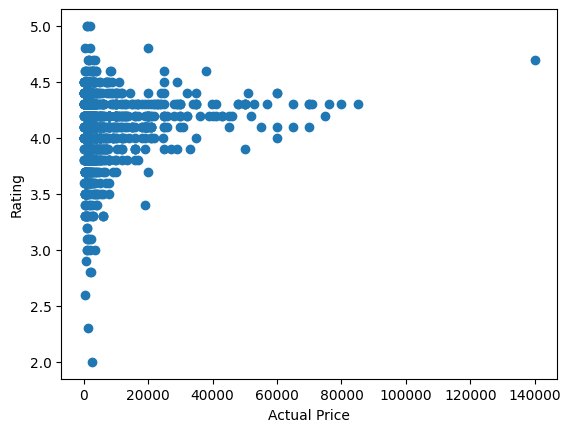

In [13]:
# Scatter plot: Actual Price vs Rating
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual Price')
plt.ylabel('Rating')
plt.show()

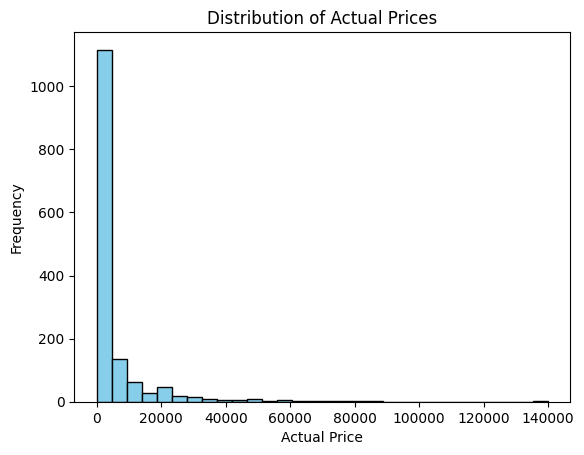

In [14]:
# Histogram of Actual Price distribution
plt.hist(df['actual_price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Prices')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to label encode
categorical_cols = [
    'product_id', 'category', 'review_id', 'review_content', 'product_name',
    'user_name', 'about_product', 'user_id', 'review_title', 'img_link', 'product_link'
]

# Initialize LabelEncoders and apply them to each column
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# All specified categorical columns are now label encoded

In [16]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,346,1158,10,399.0,1099.0,64.0,4.2,24269.0,474,623,522,817,881,604,1118,1308
1,848,134,10,199.0,349.0,43.0,4.0,43994.0,279,88,207,1025,7,413,1248,157
2,819,1023,10,199.0,1899.0,90.0,3.9,7928.0,1250,849,482,827,422,674,876,1160
3,643,1264,10,329.0,699.0,53.0,4.2,94363.0,1010,254,614,786,376,269,518,380
4,588,829,10,154.0,399.0,61.0,4.2,16905.0,1189,17,1139,114,44,120,1209,919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,673,696,192,379.0,919.0,59.0,4.0,1090.0,902,1050,646,804,868,425,595,771
1461,201,850,172,2280.0,3045.0,25.0,4.1,4118.0,76,425,537,779,1167,1184,612,946
1462,27,164,138,2219.0,3080.0,28.0,3.6,468.0,520,865,596,288,1181,1186,1088,201
1463,61,462,129,1399.0,1890.0,26.0,4.0,8031.0,395,300,885,749,212,375,1130,548


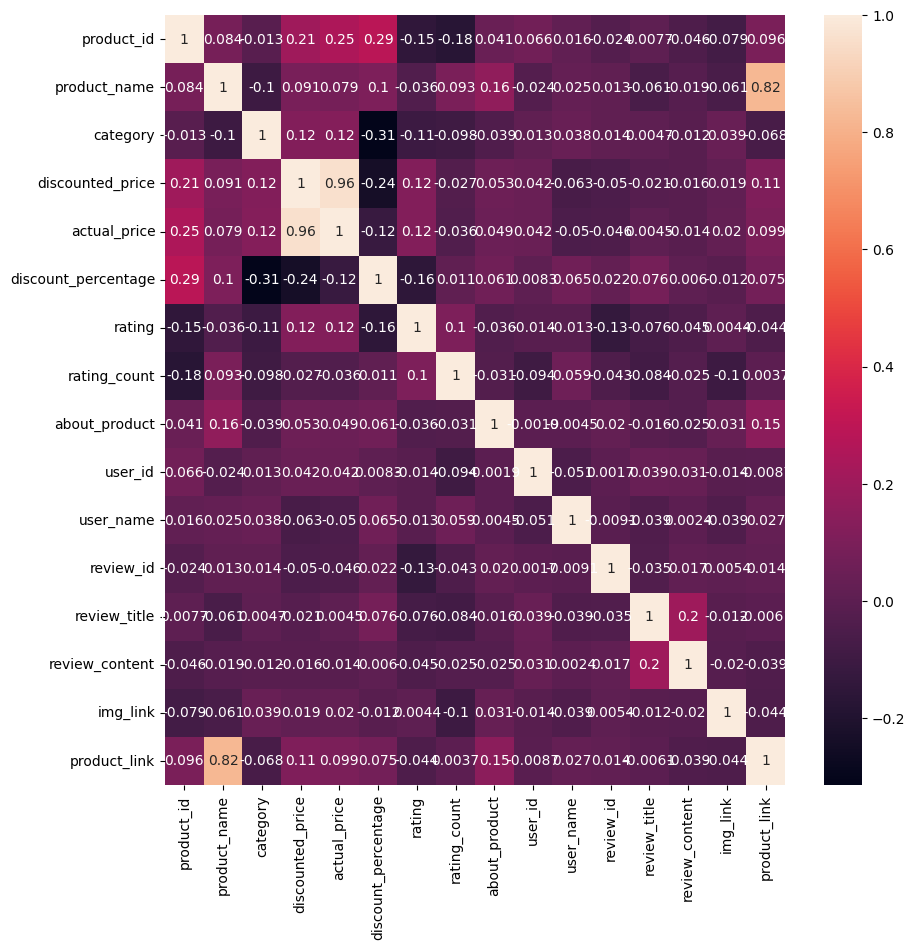

In [17]:
# Plot correlations between variables
plt.figure(figsize=(10,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [18]:
# Calculate and print correlation matrix for numerical features
correlation_matrix = df.corr()
print(correlation_matrix)

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.084089 -0.012565          0.206448   
product_name           0.084089      1.000000 -0.103778          0.090665   
category              -0.012565     -0.103778  1.000000          0.119365   
discounted_price       0.206448      0.090665  0.119365          1.000000   
actual_price           0.246733      0.078567  0.122451          0.961915   
discount_percentage    0.289514      0.101913 -0.314465         -0.242412   
rating                -0.149139     -0.035970 -0.108730          0.120335   
rating_count          -0.175787      0.092525 -0.098182         -0.027010   
about_product          0.041404      0.158263 -0.038753          0.052618   
user_id                0.065688     -0.024093  0.012707          0.041731   
user_name              0.016145      0.024598  0.037822         -0.063069   
review_id             -0.024282      0.013492  0.014015         -0.049757   

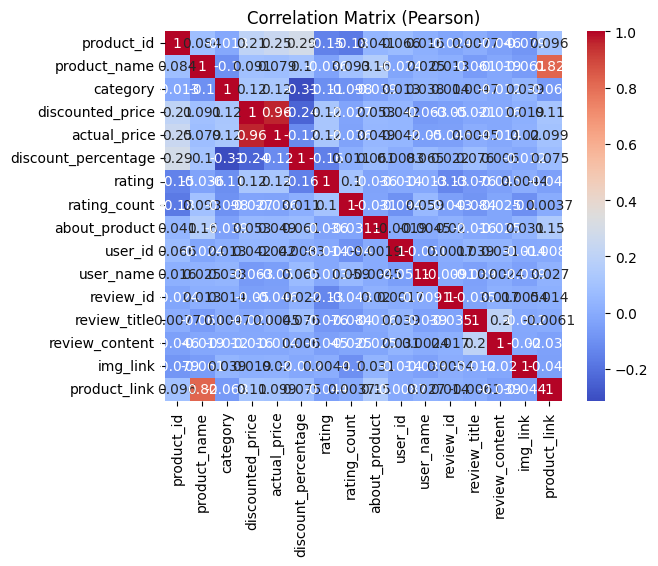

In [19]:
# Visualize the correlation matrix with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Pearson)")
plt.show()

In [20]:
#calcualte the spearman correlation matrix
spearman_correlation_matrix = df.corr(method='spearman')
print(spearman_correlation_matrix)

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.083112 -0.013553          0.146237   
product_name           0.083112      1.000000 -0.106193          0.056597   
category              -0.013553     -0.106193  1.000000          0.360733   
discounted_price       0.146237      0.056597  0.360733          1.000000   
actual_price           0.269064      0.105719  0.277291          0.932787   
discount_percentage    0.271879      0.106467 -0.322090         -0.372991   
rating                -0.144339     -0.061885 -0.100845          0.079984   
rating_count          -0.409600      0.129519 -0.168137          0.124949   
about_product          0.041118      0.157675 -0.048319         -0.056144   
user_id                0.065228     -0.023810  0.015389          0.079048   
user_name              0.016859      0.024479  0.038735         -0.018599   
review_id             -0.024644      0.015269  0.016119         -0.048420   

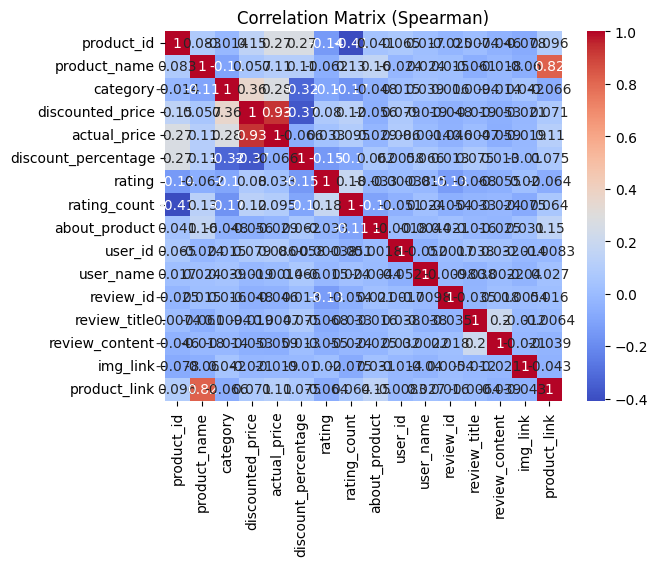

In [21]:
# Create a heatmap to visualize the Spearman correlations
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Spearman)")
plt.show()

In [22]:
correlation_coefficient  = np.corrcoef(df['actual_price'],df['rating'])[0,1]
print(correlation_coefficient )

0.12163645139700371


Grouping and Aggregation

In [23]:
# Calculate mean rating by category
mean_sales_by_category = df.groupby('category')['rating'].mean()
print(mean_sales_by_category)
print('----------------------------------------------------------------')

# Calculate median rating by review content
median_sales_by_review_content = df.groupby('review_content')['rating'].median()
print(median_sales_by_review_content)
print('----------------------------------------------------------------')

# Calculate standard deviation of actual price by product name
std_price_by_product_name = df.groupby('product_name')['actual_price'].std()
print(std_price_by_product_name)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64
----------------------------------------------------------------
review_content
0       4.1
1       3.9
2       4.3
3       4.3
4       3.8
       ... 
1207    4.0
1208    4.3
1209    4.3
1210    4.5
1211    4.3
Name: rating, Length: 1212, dtype: float64
----------------------------------------------------------------
product_name
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1332    NaN
1333    NaN
1334    NaN
1335    NaN
1336    0.0
Name: actual_price, Length: 1337, dtype: float64


In [24]:
# Pivot table: average rating by category and product link
pivot_table = df.pivot_table(values='rating', index='category', columns='product_link', aggfunc='mean')
print(pivot_table.head(2))

# Pivot table: average rating_count by review content and category
pivot_table = df.pivot_table(values='rating_count', index='review_content', columns='category', aggfunc='mean')
print(pivot_table.head(2))

product_link  0     1     2     3     4     5     6     7     8     9     ...  \
category                                                                  ...   
0              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

product_link  1455  1456  1457  1458  1459  1460  1461  1462  1463  1464  
category                                                                  
0              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   4.3  

[2 rows x 1465 columns]
category        0    1    2    3    4    5    6    7    8    9    ...  201  \
review_content                                                    ...        
0               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
1               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   

category        202  203  204  205  2

Statistical Tests:

In [25]:
import scipy.stats as stats

# Conduct t-test comparing 'rating' between 'electronics' and 'clothing' categories
t_statistic, p_value = stats.ttest_ind(
    df[df['category'] == 'electronics']['rating'],
    df[df['category'] == 'clothing']['rating']
)
print(t_statistic, p_value)

nan nan


/usr/local/lib/python3.12/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [26]:
# Conduct t-test comparing 'rating' between 'electronics' and 'clothing' categories
t_statistic, p_value = stats.ttest_ind(
    df[df['category'] == 'electronics']['rating'],
    df[df['category'] == 'clothing']['rating']
)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: nan, P-value: nan


In [27]:
# Create contingency table for chi-square test between binned actual_price and rating
# (If actual_price is continuous, consider binning it first)
contingency_table = pd.crosstab(df['actual_price'], df['rating'])
print(contingency_table)

rating        2.0  2.3  2.6  2.8  2.9  3.0  3.1  3.2  3.3  3.4  ...  4.0  4.1  \
actual_price                                                    ...             
39.0            0    0    0    0    0    0    0    0    0    0  ...    0    0   
50.0            0    0    0    0    0    0    0    0    0    0  ...    0    0   
59.0            0    0    0    0    0    0    0    0    0    0  ...    0    0   
75.0            0    0    0    0    0    0    0    0    0    0  ...    0    1   
79.0            0    0    0    0    0    0    0    0    0    0  ...    1    0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
74999.0         0    0    0    0    0    0    0    0    0    0  ...    0    0   
75990.0         0    0    0    0    0    0    0    0    0    0  ...    0    0   
79990.0         0    0    0    0    0    0    0    0    0    0  ...    0    0   
85000.0         0    0    0    0    0    0    0    0    0    0  ...    0    0   
139900.0        0    0    0 

In [28]:
# Perform chi-square test on the contingency table
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the test results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected frequencies:\n{expected}")

Chi-square statistic: 8636.74275268652
p-value: 1.0
Degrees of freedom: 10752
Expected frequencies:
[[0.00136519 0.00136519 0.00136519 ... 0.00819113 0.00409556 0.00409556]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 ...
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]]


In [29]:
from sklearn.preprocessing import LabelEncoder
# label encode categorical variables

le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()

df['product_id'] = le_product_id.fit_transform(df['product_id'])
df['category'] = le_category.fit_transform(df['category'])
df['review_id'] = le_review_id.fit_transform(df['review_id'])
df['review_content'] = le_review_content.fit_transform(df['review_content'])
df['product_name'] = le_product_name.fit_transform(df['product_name'])
df['user_name'] = le_user_name.fit_transform(df['user_name'])
df['about_product'] = le_about_product.fit_transform(df['about_product'])
df['user_id'] = le_user_id.fit_transform(df['user_id'])
df['review_title'] = le_review_title.fit_transform(df['review_title'])
df['img_link'] = le_img_link.fit_transform(df['img_link'])
df['product_link'] = le_product_link.fit_transform(df['product_link'])

Insights from the data

In [30]:
# Find the average rating for each category
average_rating = df.groupby("category")["rating"].mean().reset_index()

# Rename 'rating' column to 'average_rating'
average_rating = average_rating.rename(columns={"rating": "average_rating"})
average_rating

,category,average_rating
0,0,3.800000
1,1,4.150000
2,2,3.500000
3,3,3.600000
4,4,4.050000
...,...,...
206,206,4.250000
207,207,4.150000
208,208,4.300000
209,209,4.133333


The output shows that most product categories have generally positive customer feedback, with average ratings above 3.50.
However, some categories (e.g., 2 and 3) have lower ratings


In [31]:
#Finding the top rating_count products by category
top_rated_per_category = df.groupby('category').apply(lambda x:  x.nlargest(10,"rating_count")).reset_index(drop= True)
top_rated_per_category.head(8)

/tmp/ipython-input-1765197177.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rated_per_category = df.groupby('category').apply(lambda x:  x.nlargest(10,"rating_count")).reset_index(drop= True)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,788,915,0,2339.0,4000.0,42.0,3.8,1118.0,1203,656,210,911,637,83,1244,1015
1,830,1335,1,294.0,4999.0,94.0,4.3,4426.0,1284,788,573,774,959,968,1171,1464
2,805,541,1,149.0,399.0,63.0,4.0,1540.0,1286,363,41,252,277,1029,1387,615
3,25,477,2,649.0,999.0,35.0,3.5,7222.0,778,451,306,744,540,668,201,506
4,725,515,3,949.0,2000.0,53.0,3.9,14969.0,681,528,193,335,601,501,511,603
5,640,445,3,199.0,499.0,60.0,3.3,2804.0,898,444,63,1010,738,982,507,528
6,664,1225,4,849.0,1499.0,43.0,4.0,7352.0,1000,381,250,616,696,1135,918,1369
7,724,1213,4,649.0,1300.0,50.0,4.1,5195.0,1146,178,654,204,12,947,571,1360


In [32]:
#Distribution of discounted prices vs. actual prices
df.columns.to_list()

['product_id',
 'product_name',
 'category',
 'discounted_price',
 'actual_price',
 'discount_percentage',
 'rating',
 'rating_count',
 'about_product',
 'user_id',
 'user_name',
 'review_id',
 'review_title',
 'review_content',
 'img_link',
 'product_link']

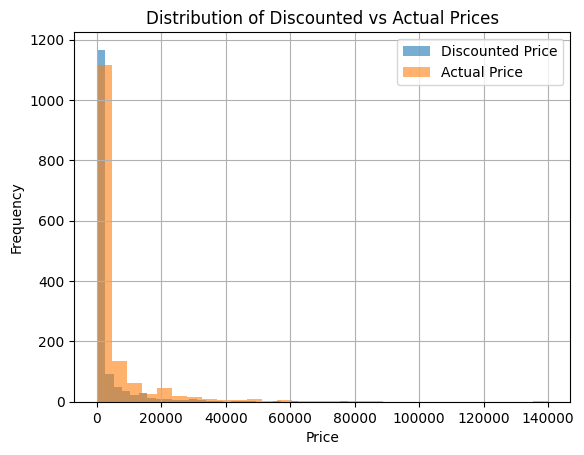

In [33]:
# Plot distribution of discounted price and actual price
df['discounted_price'].hist(alpha=0.6, label='Discounted Price', bins=30)
df['actual_price'].hist(alpha=0.6, label='Actual Price', bins=30)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Discounted vs Actual Prices')
plt.show()

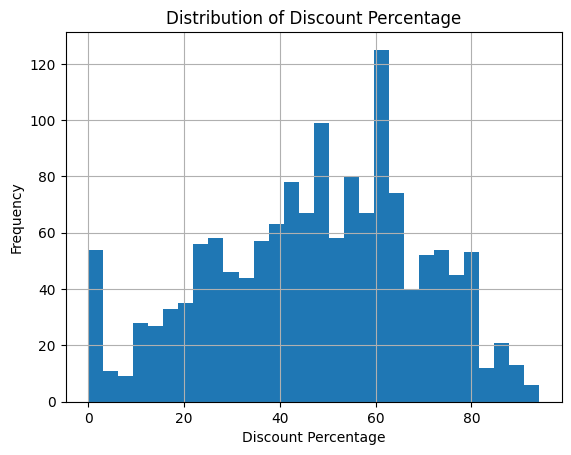

In [34]:
# Calculate discount percentage
df['discount_percentage'] = (df['actual_price'] - df['discounted_price']) * 100 / df['actual_price']

# Plot distribution of discount percentage
df['discount_percentage'].hist(bins=30)
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Discount Percentage')
plt.show()

In [35]:
# Calculate average discount percentage per category
avg_discount_per_category = df.groupby('category')['discount_percentage'].mean()

# Display results
print(avg_discount_per_category)

category
0      41.525000
1      78.387733
2      35.035035
3      56.335120
4      46.719582
         ...    
206     0.000000
207     5.000000
208    17.619048
209    13.074074
210     0.000000
Name: discount_percentage, Length: 211, dtype: float64


In [36]:
# Count how many times each product name appears
product_counts = df["product_name"].value_counts()

# Display the top 3 most frequent (popular) product names
print(product_counts.head(3))

product_name
384    5
386    4
118    3
Name: count, dtype: int64


In [37]:
# Function to extract lowercase alphabetic keywords from product names
def extract_keywords(product_name):
    if isinstance(product_name, str):
        words = product_name.lower().split()
        keywords = [word for word in words if word.isalpha()]  # Keep only alphabetic words
    else:
        keywords = []
    return keywords

# Apply the function to extract keywords from each product name
df["keywords"] = df["product_name"].apply(extract_keywords)

# Flatten the list of keyword lists into a single list
all_keywords = [keyword for keywords in df["keywords"] for keyword in keywords]

# Count the frequency of each keyword
keyword_counts = pd.Series(all_keywords).value_counts()

# Display the top 5 most frequent keywords
print(keyword_counts.head(5))

Series([], Name: count, dtype: int64)


In [38]:
#correlation between discounted_price and rating
correlation_coefficient =  df["discounted_price"].corr(df["rating"])

# Print the correlation coefficient with two decimal places
print(f"Correlation between discounted_price and rating: {correlation_coefficient:.2f}")

Correlation between discounted_price and rating: 0.12


In [39]:
#Top 5 categories based with highest ratings

# Group data by category and calculate average rating
average_ratings = df.groupby("category")["rating"].mean().reset_index()

# Sort by average rating in descending order
average_ratings = average_ratings.sort_values(by="rating", ascending=False)

# Print the top 5 categories
print("Top 5 categories with highest average ratings:")
for i in range(5):
    category = average_ratings.iloc[i]["category"]
    average_rating = average_ratings.iloc[i]["rating"]
    print(f"{i+1}. {category}: {average_rating:.2f}")

Top 5 categories with highest average ratings:
1. 57.0: 4.60
2. 48.0: 4.50
3. 62.0: 4.50
4. 38.0: 4.50
5. 81.0: 4.50
